<a href="https://colab.research.google.com/github/Suman-Adhikary/Loan-prediction-Analytics-Vidya-/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries.

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('darkgrid')

# Import Datasets.

In [311]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [312]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [313]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [314]:
train_data.shape, test_data.shape

((614, 13), (367, 12))

# Data Preprocessing.

In [315]:
Loan_id = test_data['Loan_ID']
train_data = train_data.drop(['Loan_ID'], axis = 1)
test_data = test_data.drop(['Loan_ID'], axis = 1)

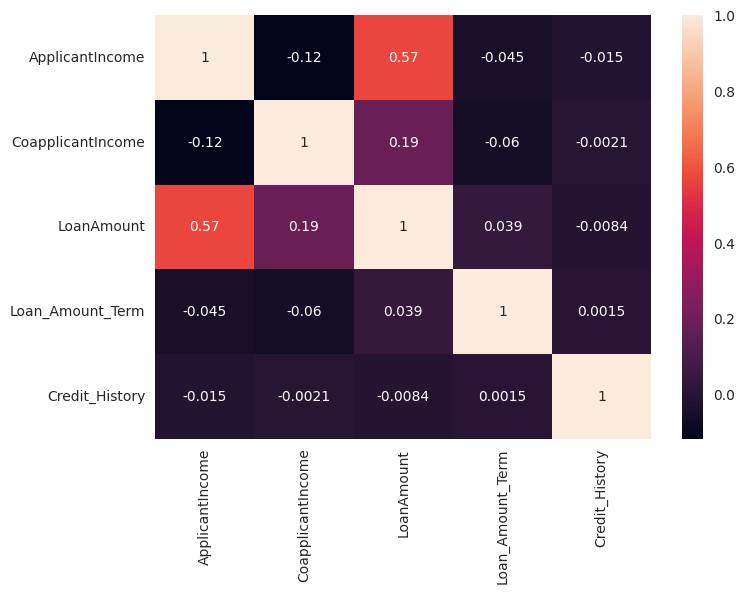

In [316]:
matrix = train_data.corr()
sns.heatmap(matrix, annot=True)
plt.show()

In [317]:
X = train_data.iloc[:, 0:-1]
y = train_data.iloc[:, -1]

In [318]:
X.shape, y.shape

((614, 11), (614,))

# Univariate Analysis.

## Target Variable.

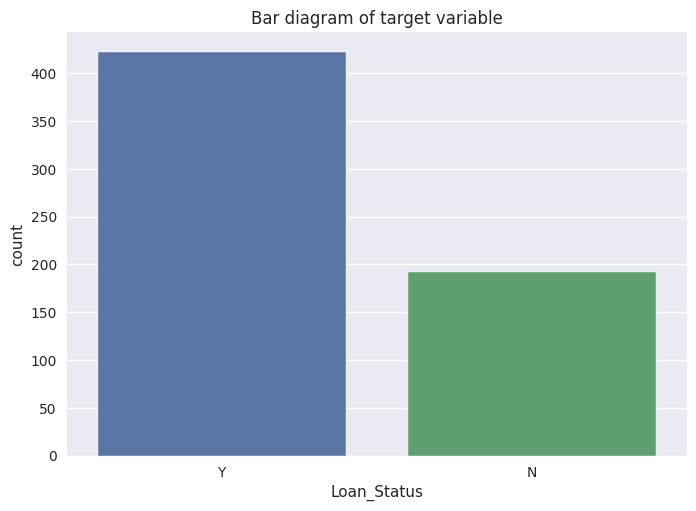

In [319]:
sns.countplot(data = train_data, x = train_data['Loan_Status'])
plt.title('Bar diagram of target variable')
plt.show()

## Categorical Columns.

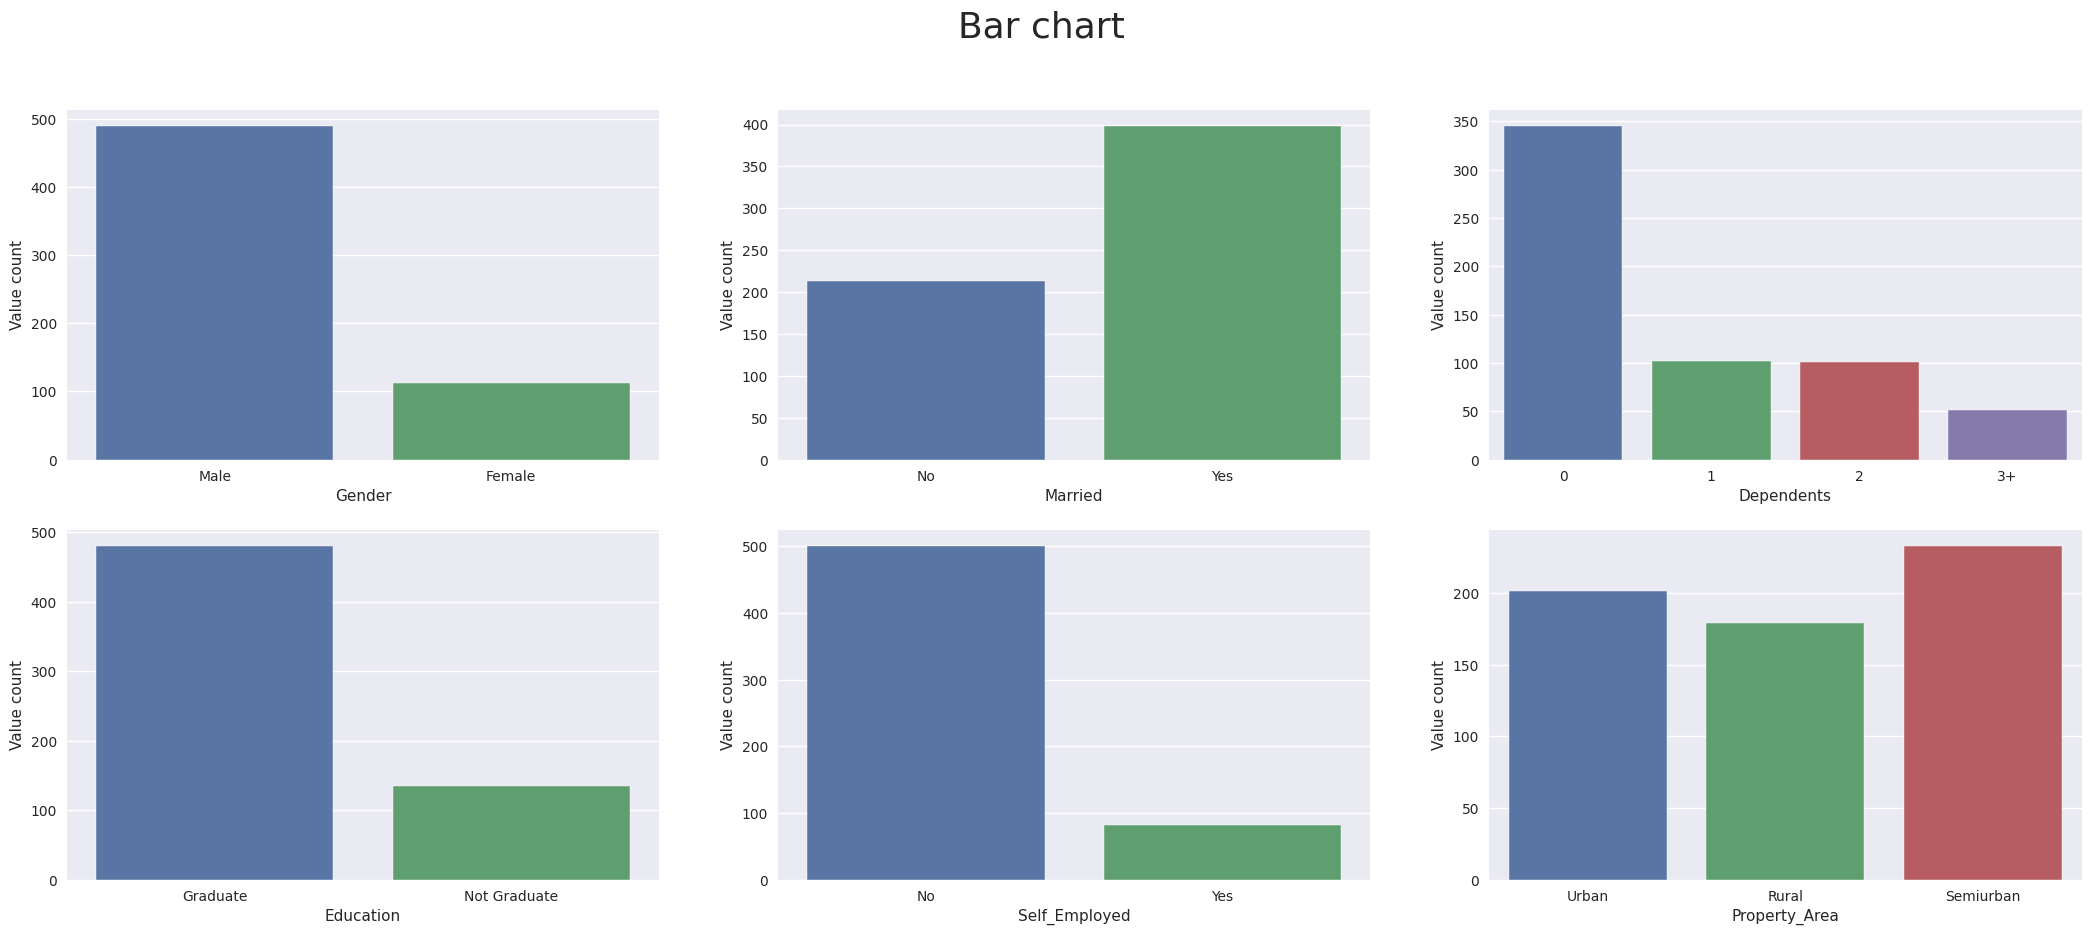

In [320]:
col = [col for col in X.columns if X[col].dtypes == 'object']

fig, axs = plt.subplots(2, 3, figsize=(26, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(3):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.countplot(data = X, x = X[col[i]], ax=Axis[i])
    Axis[i].set_ylabel('Value count')

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
    
fig.suptitle("Bar chart", fontsize=26)
plt.show()

## Numerical Column.

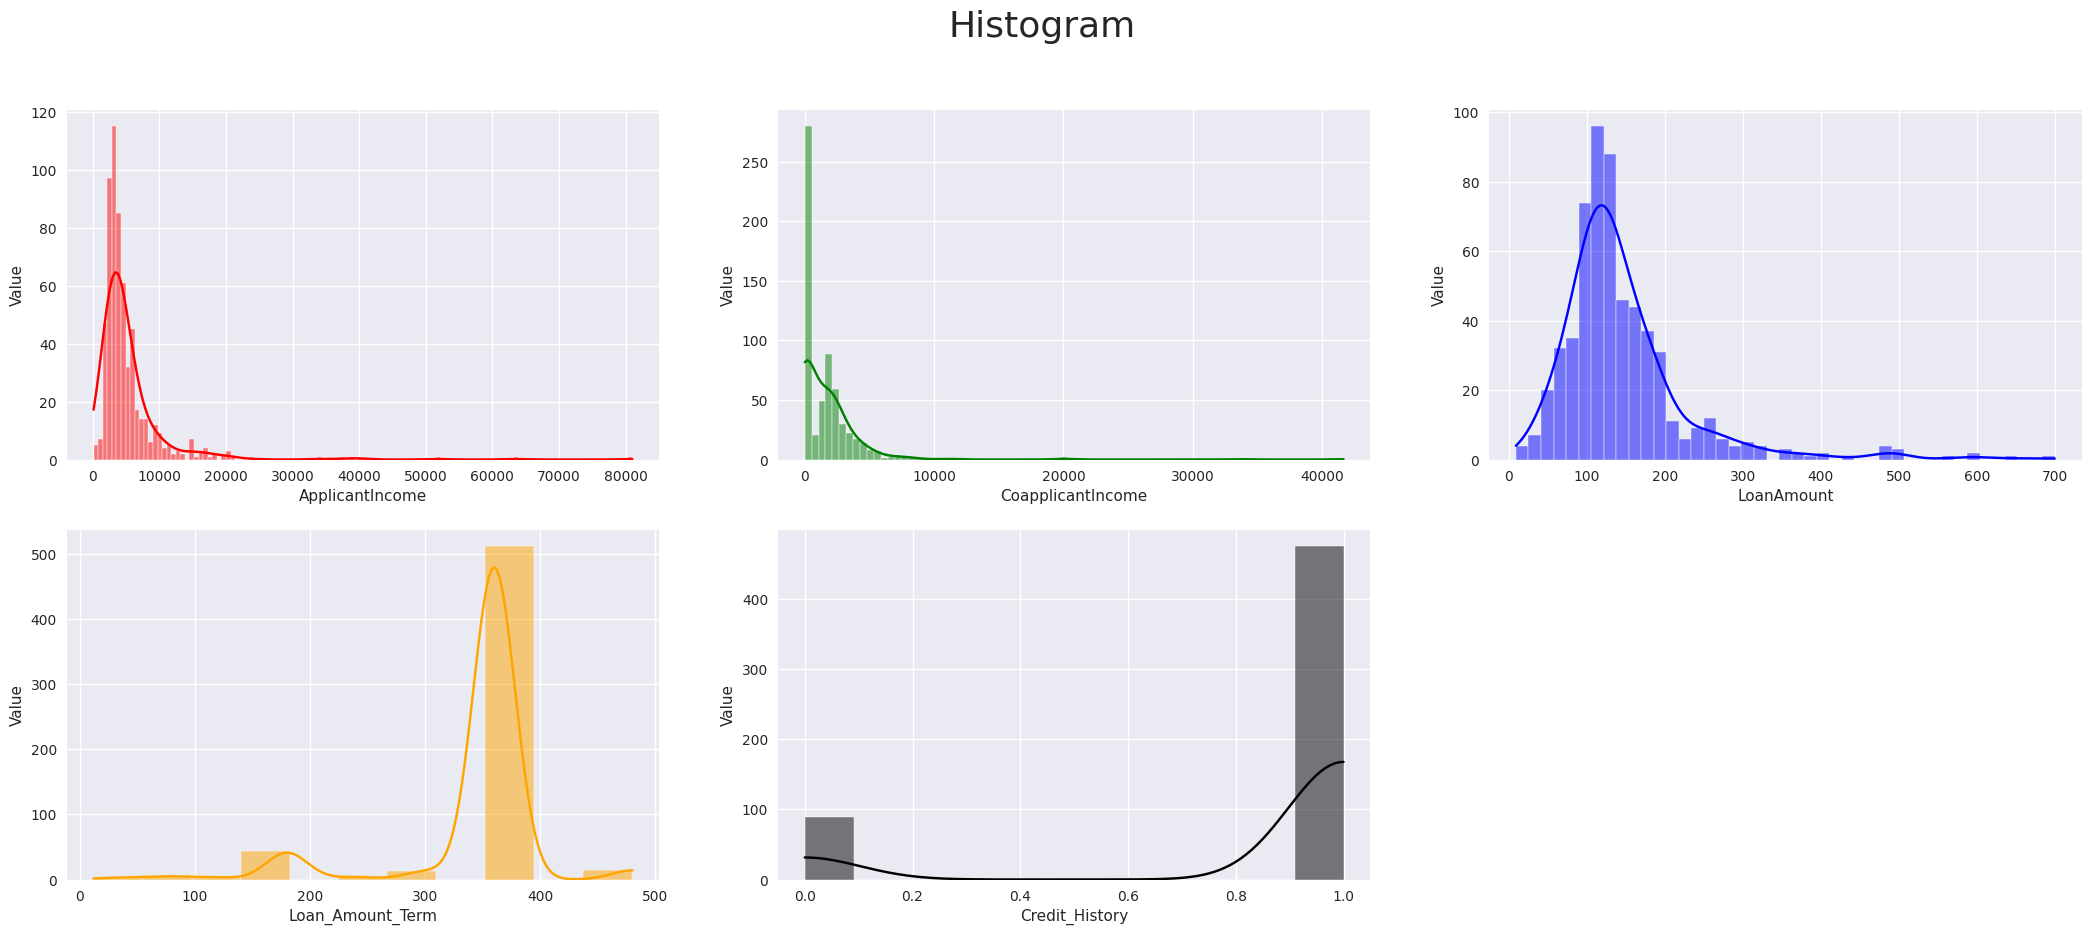

In [321]:
col = [col for col in X.columns if X[col].dtypes == 'float64' or X[col].dtypes == 'int64']
Color = ['red', 'green', 'blue', 'orange', 'black']

fig, axs = plt.subplots(2, 3, figsize=(26, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(3):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.histplot(X[col[i]], kde=True, ax=Axis[i], color = Color[i])
    Axis[i].set_ylabel('Value')

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
    
fig.suptitle("Histogram", fontsize=26)
plt.show()

# Bivariate Analysis.

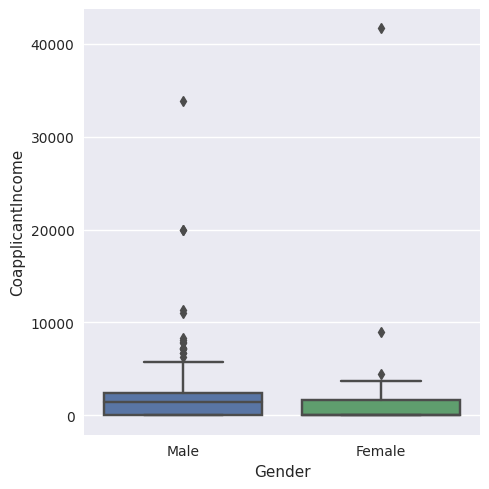

In [322]:
# Gender VS Co applicant income.
sns.catplot(x='Gender',y='CoapplicantIncome',data=train_data,kind='box')
plt.show()

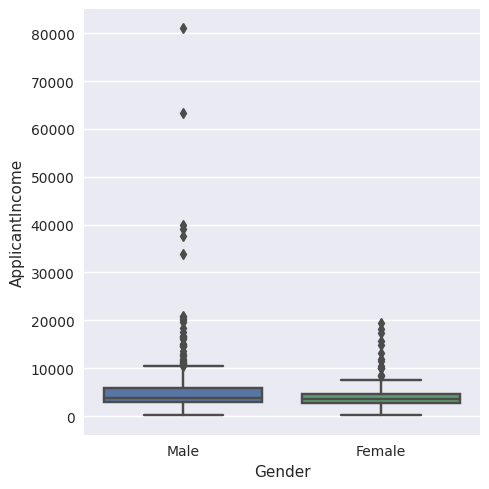

In [323]:
sns.catplot(x='Gender',y='ApplicantIncome',kind='box',data=X)
plt.show()

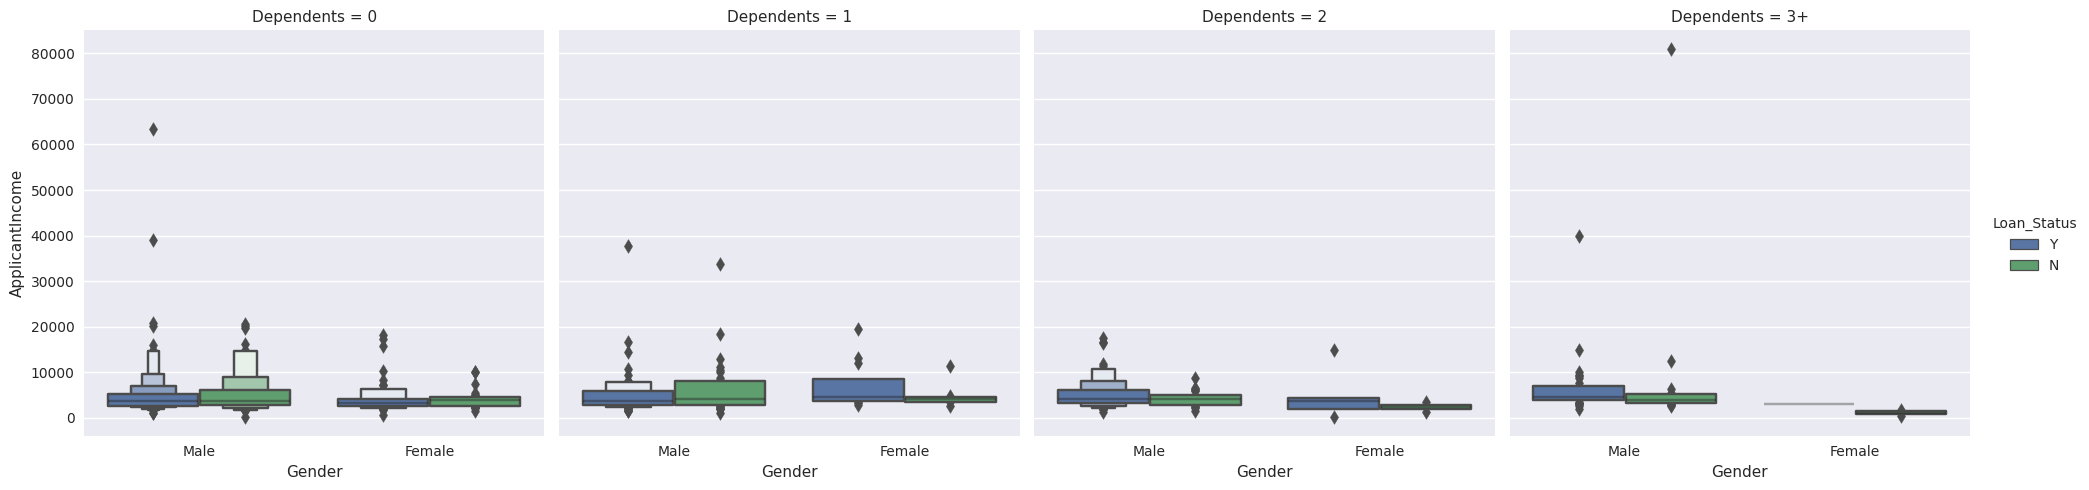

In [324]:
sns.catplot(x='Gender',y='ApplicantIncome',data=train_data,kind='boxen',hue='Loan_Status', col='Dependents')
plt.show()

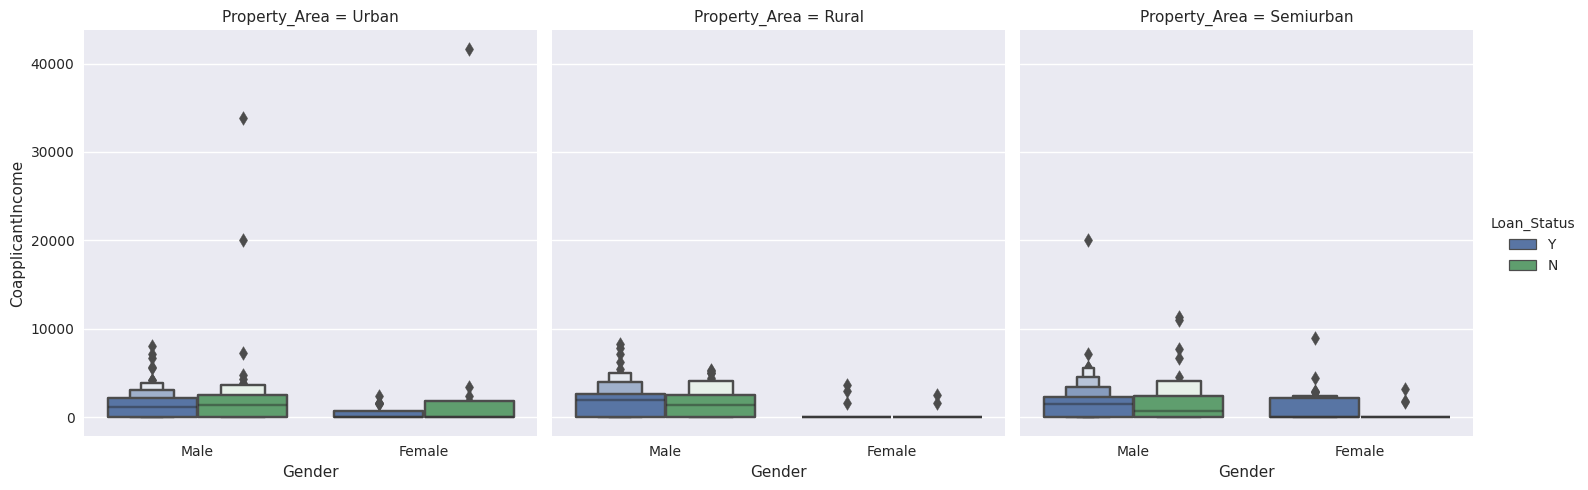

In [325]:
sns.catplot(x='Gender',y='CoapplicantIncome',data=train_data,kind='boxen',hue='Loan_Status', col='Property_Area')
plt.show()

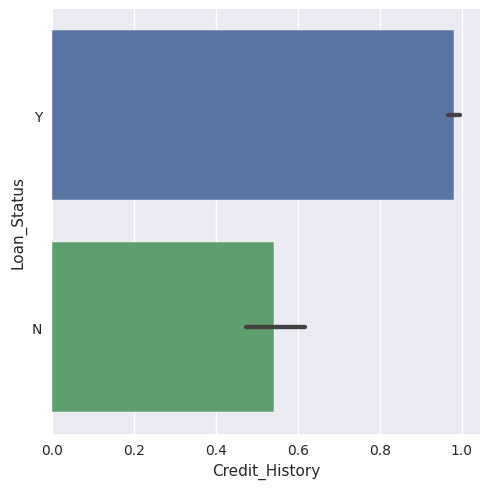

In [326]:
# Loan_Status VS Credit_History.
sns.catplot(x='Credit_History',y='Loan_Status',kind='bar',data=train_data)
plt.show()

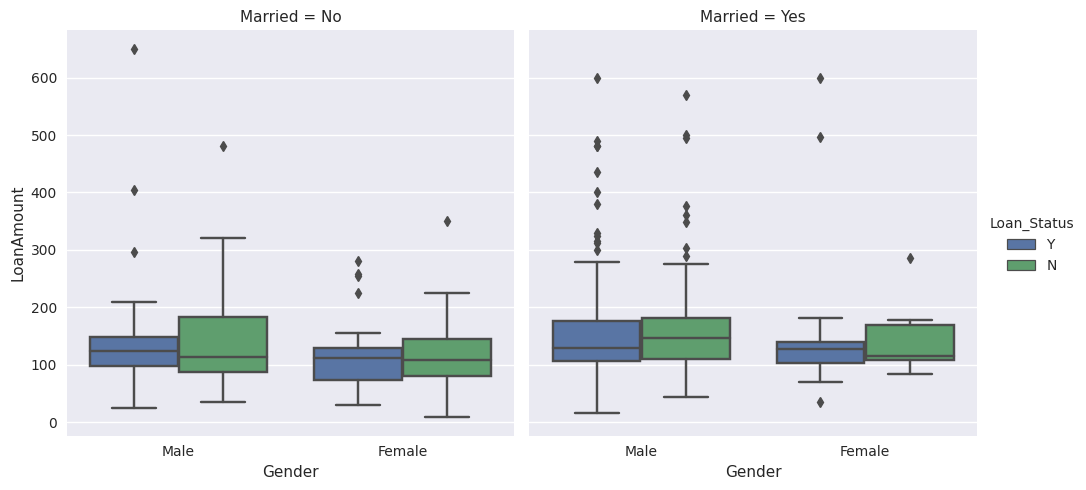

In [327]:
sns.catplot(x='Gender',y='LoanAmount',data=train_data,kind='box',hue='Loan_Status', col='Married')
plt.show()

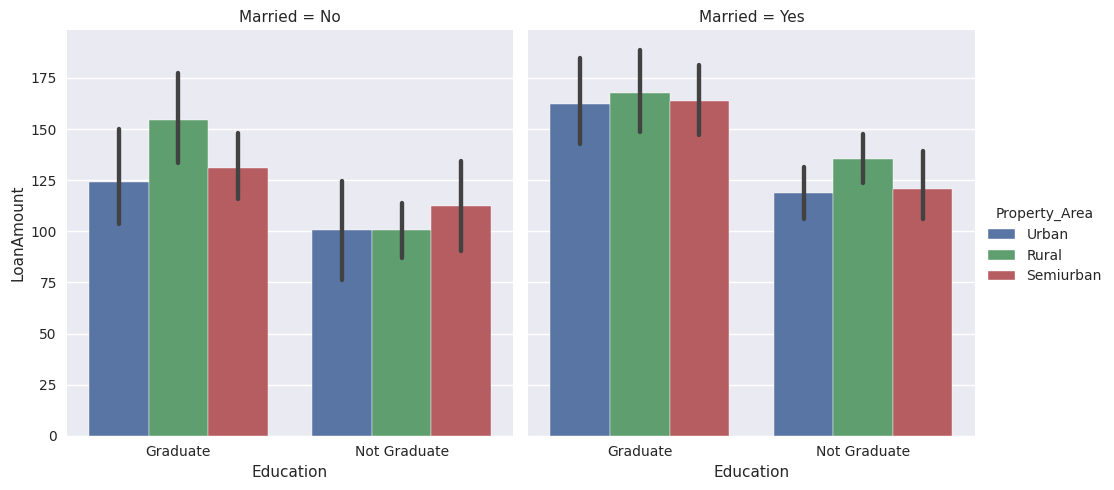

In [328]:
sns.catplot(x='Education',y='LoanAmount',kind='bar',data=train_data,col='Married',hue='Property_Area')
plt.show()

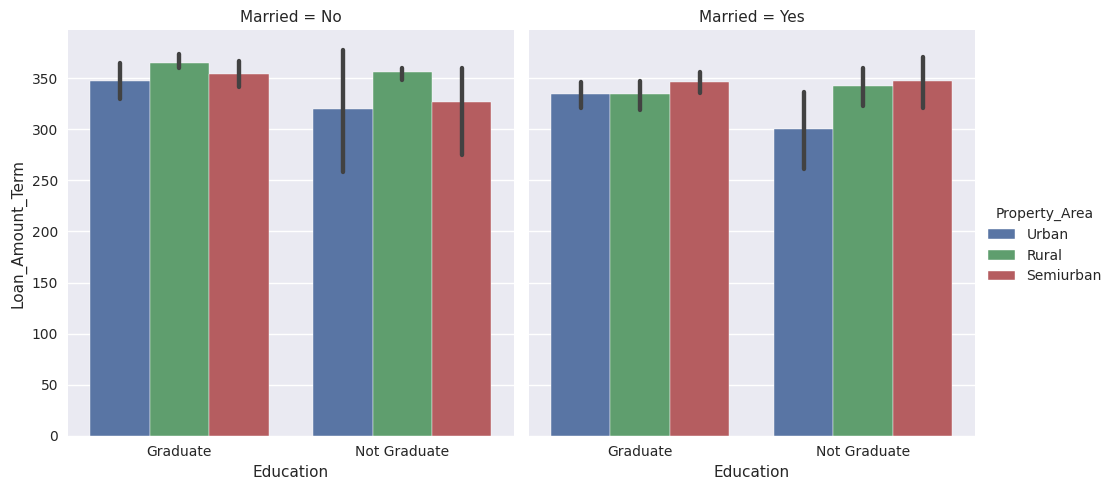

In [329]:
sns.catplot(x='Education',y='Loan_Amount_Term',kind='bar',data=train_data,col='Married',hue='Property_Area')
plt.show()

# Features.

## Train Data.

In [330]:
cols = [col for col in X.columns]
missing = [X[col].isna().sum() for col in X.columns]
unique = [X[col].nunique() for col in X.columns]
dtypes = [X[col].dtypes for col in X.columns]
infoTable = PrettyTable()
infoTable.add_column('column', cols)
infoTable.add_column('Missing val', missing)
infoTable.add_column('Unique no', unique)
infoTable.add_column('Data type', dtypes)
print(infoTable)

+-------------------+-------------+-----------+-----------+
|       column      | Missing val | Unique no | Data type |
+-------------------+-------------+-----------+-----------+
|       Gender      |      13     |     2     |   object  |
|      Married      |      3      |     2     |   object  |
|     Dependents    |      15     |     4     |   object  |
|     Education     |      0      |     2     |   object  |
|   Self_Employed   |      32     |     2     |   object  |
|  ApplicantIncome  |      0      |    505    |   int64   |
| CoapplicantIncome |      0      |    287    |  float64  |
|     LoanAmount    |      22     |    203    |  float64  |
|  Loan_Amount_Term |      14     |     10    |  float64  |
|   Credit_History  |      50     |     2     |  float64  |
|   Property_Area   |      0      |     3     |   object  |
+-------------------+-------------+-----------+-----------+


## Test Data.

In [331]:
cols = [col for col in test_data.columns]
missing = [test_data[col].isna().sum() for col in test_data.columns]
unique = [test_data[col].nunique() for col in test_data.columns]
dtypes = [test_data[col].dtypes for col in test_data.columns]
infoTable = PrettyTable()
infoTable.add_column('column', cols)
infoTable.add_column('Missing val', missing)
infoTable.add_column('Unique no', unique)
infoTable.add_column('Data type', dtypes)
print(infoTable)

+-------------------+-------------+-----------+-----------+
|       column      | Missing val | Unique no | Data type |
+-------------------+-------------+-----------+-----------+
|       Gender      |      11     |     2     |   object  |
|      Married      |      0      |     2     |   object  |
|     Dependents    |      10     |     4     |   object  |
|     Education     |      0      |     2     |   object  |
|   Self_Employed   |      23     |     2     |   object  |
|  ApplicantIncome  |      0      |    314    |   int64   |
| CoapplicantIncome |      0      |    194    |   int64   |
|     LoanAmount    |      5      |    144    |  float64  |
|  Loan_Amount_Term |      6      |     12    |  float64  |
|   Credit_History  |      29     |     2     |  float64  |
|   Property_Area   |      0      |     3     |   object  |
+-------------------+-------------+-----------+-----------+


# Missing Value.

## Numeric Data.

In [332]:
numeric_imputer_X = SimpleImputer(missing_values=np.nan, strategy='median')
numeric_imputer_test = SimpleImputer(missing_values=np.nan, strategy='median')

numeric_imputer_X.fit(X[['LoanAmount', 'Loan_Amount_Term']])
numeric_imputer_test.fit(test_data[['LoanAmount', 'Loan_Amount_Term']])

X[['LoanAmount', 'Loan_Amount_Term']] = numeric_imputer_X.transform(X[['LoanAmount', 'Loan_Amount_Term']])
test_data[['LoanAmount', 'Loan_Amount_Term']] = numeric_imputer_test.transform(test_data[['LoanAmount', 'Loan_Amount_Term']])

numeric_imputer_X = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
numeric_imputer_test = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

numeric_imputer_X.fit(X[['Credit_History']])
numeric_imputer_test.fit(test_data[['Credit_History']])

X[['Credit_History']] = numeric_imputer_X.transform(X[['Credit_History']])
test_data[['Credit_History']] = numeric_imputer_test.transform(test_data[['Credit_History']])

## Categorical Data.

In [333]:
cat_imputer_X = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_imputer_test = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

cat_imputer_X.fit(X[['Gender', 'Married', 'Dependents', 'Self_Employed']])
X[['Gender', 'Married', 'Dependents', 'Self_Employed']] = cat_imputer_X.transform(X[['Gender', 'Married', 'Dependents', 'Self_Employed']])

cat_imputer_test.fit(test_data[['Gender', 'Dependents', 'Self_Employed']])
test_data[['Gender', 'Dependents', 'Self_Employed']] = cat_imputer_test.transform(test_data[['Gender', 'Dependents', 'Self_Employed']])

In [334]:
X.isna().sum().sum(), test_data.isna().sum().sum()

(0, 0)

# Feature Engineering.

In [335]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [336]:
X["Dependents"] = X["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

test_data["Dependents"] = test_data["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

In [337]:
X['Credit_History'] = X['Credit_History'].map({1.0 : 1, 0.0 : 0})
test_data['Credit_History'] = test_data['Credit_History'].map({1.0 : 1, 0.0 : 0})

# Outlier.

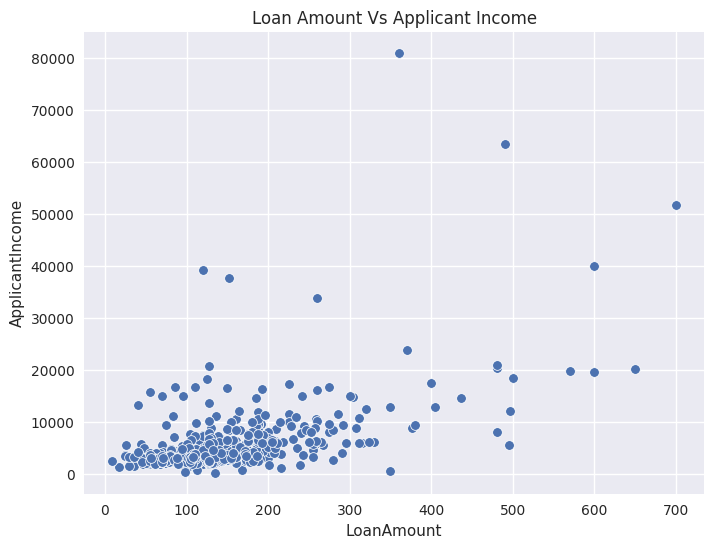

In [338]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', data=X)
title = plt.title('Loan Amount Vs Applicant Income')

In [339]:
outlier_index = X[(X['LoanAmount'] > 520)
                           & (X['ApplicantIncome'] > 30000)].index
X.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

# Categorical to numeric.

In [340]:
X = pd.get_dummies(X, drop_first=True)
y = pd.get_dummies(y, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

In [341]:
scaler = StandardScaler()
scaler.fit(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]=scaler.transform(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

In [342]:
scaler = StandardScaler()
scaler.fit(test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]=scaler.transform(test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

# Model Development.

In [343]:
X = X.iloc[:, :].values
y = y.iloc[:, :].values
test_data = test_data.iloc[:, :].values

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [345]:
model1 = LogisticRegression(solver='liblinear')
model2 = KNeighborsClassifier(n_neighbors=4)
model3 = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 42)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [346]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)

In [347]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [348]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.6837606837606838 0.7243589743589745 0.7026862026862027


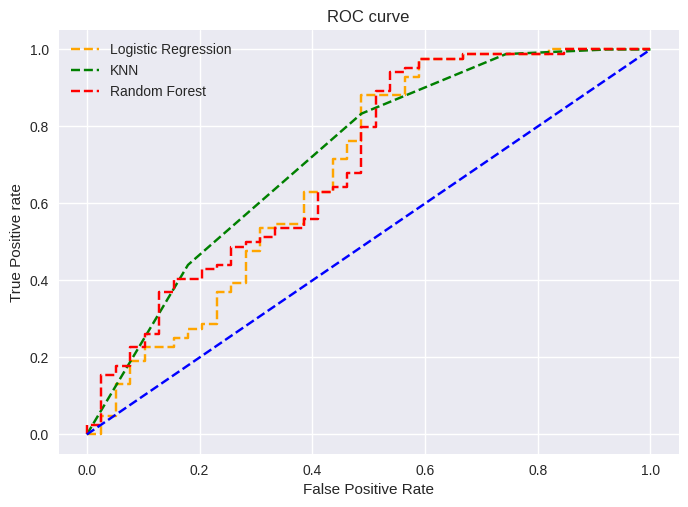

In [349]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [350]:
cf = confusion_matrix(y_test, model1.predict(X_test))
print(cf)
print(accuracy_score(y_test, model1.predict(X_test)))

[[16 23]
 [ 2 82]]
0.7967479674796748


In [351]:
print(classification_report(y_test, model3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



In [352]:
df = {
    'Loan_ID' : Loan_id,
    'Loan_Status' : model1.predict(test_data)
}

df = pd.DataFrame(df)
for i in range(len(df)):
  if df['Loan_Status'][i] == 1:
    df['Loan_Status'][i] = 'Y'
  else:
    df['Loan_Status'][i] = 'N'  
df.to_csv('submission.csv')

In [353]:
df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
